## CNN

### Filters
* from notes page 37 to 70 of notes
* filters are used to emphasize or reduce the comtrast of different regions of imags. As a result, all the edges/patterns will be recognized by the deep layers of CNN
* if we use the opposite signs of filter, we emphasize/amplifies the contrast, and reduce the contribution of images if there is no contrast in the image
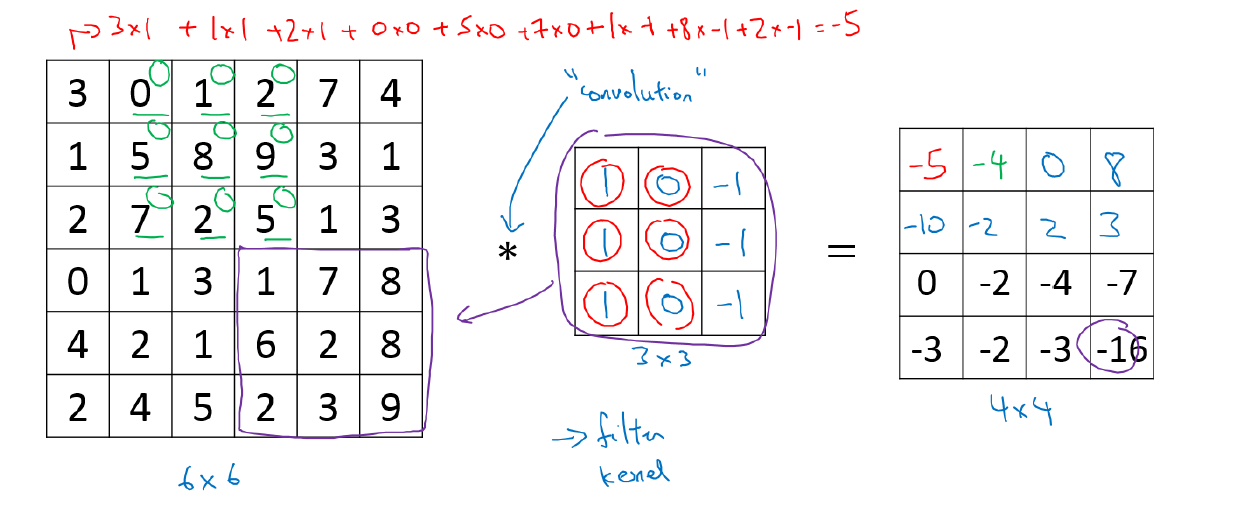
* To emphasize the middle region, we use the same vectors on the edge regions, but large weights (absolute values on the middle row)
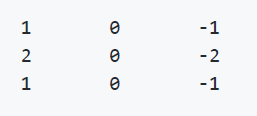

* As a general rule, (n,n) matrix convolved with (f,f) filter/kernel gives (n-f+1, n-f+1) matrix
  + a 6 times 6 image converted by a 3 times 3 filter results in a 4 times 4 image. (6 - 3 + 1) = 4
  + the convolution operation shrinks the matrix if f > 1
  
* Problems of convolution
  + images keep shrinking and we lose a lot of data
  + edge pixels are used less than other pixels in an image
* using padding to solve convolution problem by adding extra rows and columns to images (usually with values = 0s)
  + these rows and columns are inserted in top, bottom, left and right of the image
  + in general, if a (n, n) matrix is convolved with (f, f) filter and padding p gives (n+2p-f+1, n+2p-f+1) matrix
  + same convolution is a convolution with a pad so that output size is the same as the input size. P= (f-1)/ 2
  + in computer vision f is usually odd. One reason is that it has a center value
* Strided convultion
  + use stride s as the number of pixels to jump when convolve filter/kernel.
  + a (n, n) matrix convlved with (f,f) filter and with padding p and stride s give us (n+2p-f)/s +1, (n+2p-f)/s matrix
  + to maintain a same convolutions, p = (ns - n + f - s) /2
  
* convolutions over volumes
  + when convolve an image of height, weight and number of channels with a filter of height, weight and the same number of channels (we always use the same number of channels as the number of channels of the image)
  + all these channels of the filter belong to the same filter
  + example: using a filter of (3,3,3) with p = 0 and s = 1, to an image of (6,6,3) where 6, 6, and 3 are the width, height and the number of channels of the image will result in a 2d image of (4, 4, 1) with only one channel. 
  + we can use multiple filters to detect multiple features or edges.
    + example: using 10 filters of (3, 3, 3), with p = 0 and s = 1 to an input image of (6, 6, 3) results in an image of (4, 4, 10) 
  

### Convolution transform
* we convolve filters to a given input and then add a bias to each filter ouptput and get RELU of the result
  + see the example below
  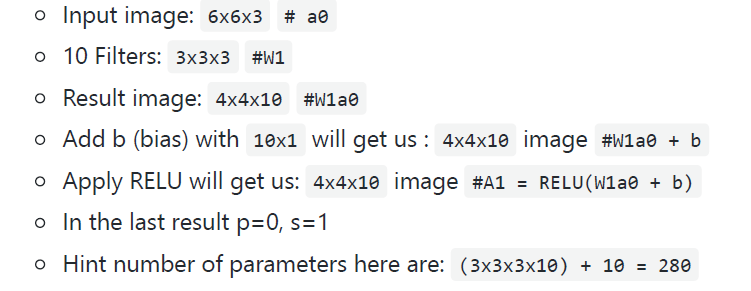
  + no matter the size of the input, the number of the parameters is the same if filter size is same, making it much less prone to overfitting
* notations used in convulution 
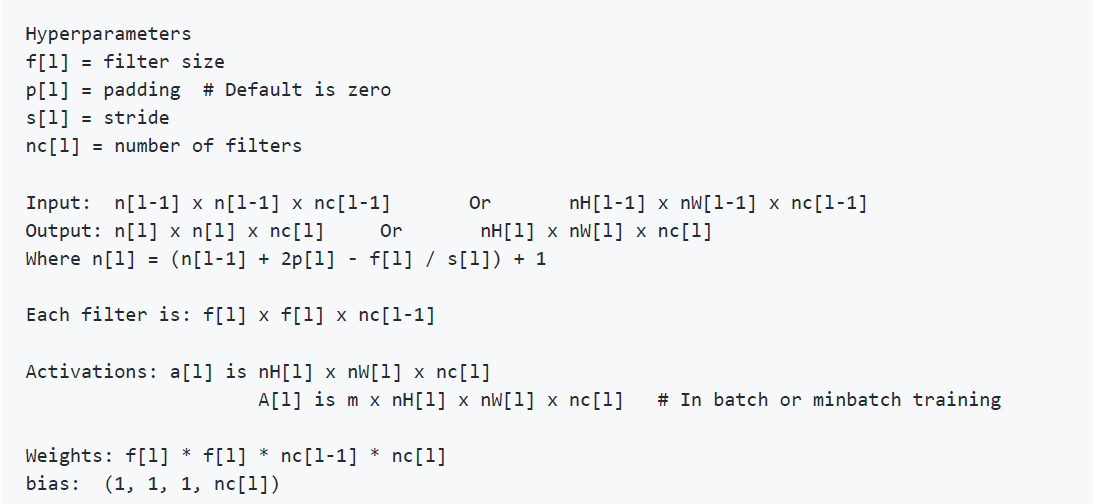
* an example of the matrix sizes after each step of convlution
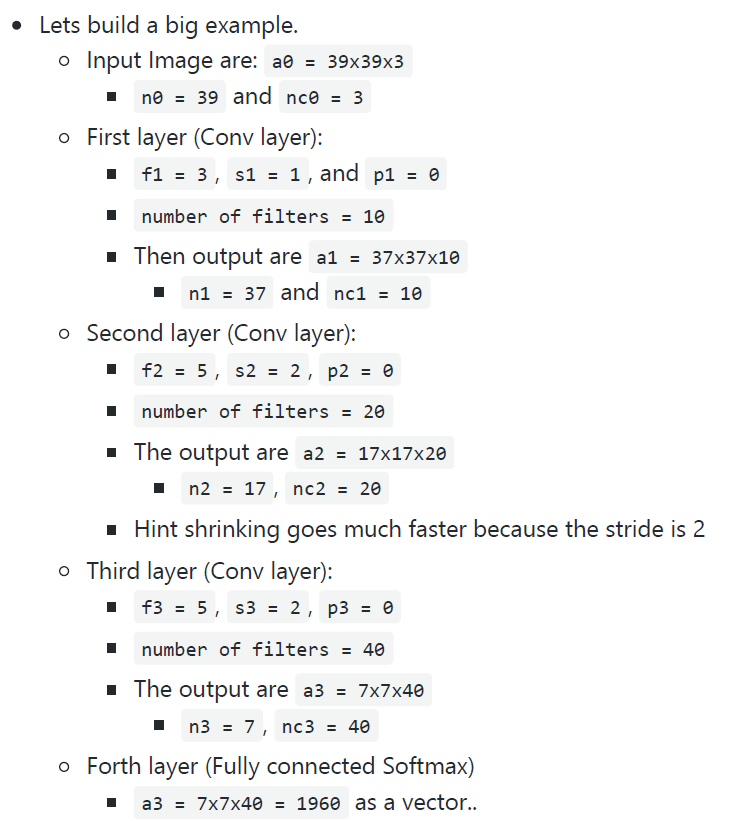

* There are three types of layers in a convolution network:
  + convolution 
  + pooling
  + fully connected
* purpose of pooling
  + reduce the size of the inputs
  + speed up computation
  + make some of the features it detects more robust
  + max pooling
    + take the max value of each filter
    + works well in practice and reduce computations
    + no parameters to learn
    + the following example has f = 2, s = 2, and p = 0
    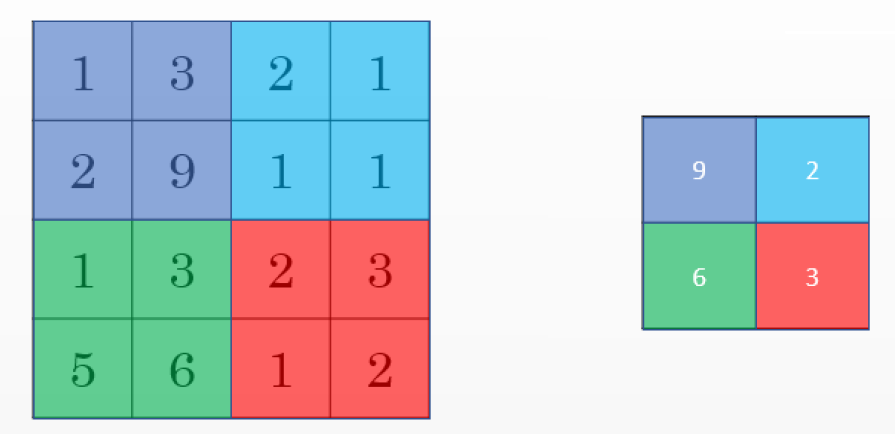
    
      + input (4, 4, 10)
      + max pooling size = 2 and stride = 2: (n - 2) / s + 1 = (4-2)/2 + 1 = 2
      + output: (2, 2, 10)
* Why convolutions?
  + parameter sharing
    + a feature detector (such as a vertical edge detector) that is useful in one part of the image is probably useful in another part of the image
  + sparsity of connections
    + in each layer, each outut value depends only on a small number of inputs which makes it tanslation invariance
    
### classical CNN networks
* LeNet-5
  + used to identify handwritten digits in (32, 32, 1) gray image
  + published in 1998
  + has 60K parameters
  + dimension of image decreases as the number of channels increases
  + a common arrangement of conv-> pool -> conv -> pool -> fc -> fc -> softmax
  + didn't use softmax when published
  + activation function used in the paper was sigmoid and Tanh. Modern implementation uses RELU 
* AlexNet
  + goal was the ImageNet challenge which classifies images into 1000 classes
  + conv -> max pool -> conv -> max pool -> conv(3 times) -> max pool -> flatten -> fc -> fc -> softmax
  + similar to leNet 5 but bigger
  + 60 million parameters
  + used RELU    
* VGG
  + modification of AlexNet
  + used a lot (3, 3) filters with s = 1, same as conv layer and max-pool (2, 2), s =2
  + typical conv-pool alternative pattern repeated for 5 times, and two fc layers with a softmax of 1000 outputs. The channel in each of the 5 repeated patterns are 64, 128, 256, 512 and 512
  + 138 million parameters. Most parameters are in fc layers
  + memory of 96MB per image for only forward propagation and most memory are in early layers
  + pooling was the only one who is responsible for shrinking the dimensions
* ResNet
  + built out of some residual blocks
  + added a shortcut/skip connection before the second activation (both z of the current layer and activated a of a previous layer are used as the input of the activation of the current layer)
  + if we go deeper we will get a better solution to our problem, but because of the vanishing and exploding gradients problems the performance of the newwork suffers as it goes deeper. Residual network allows us to go deeper as we want
  + 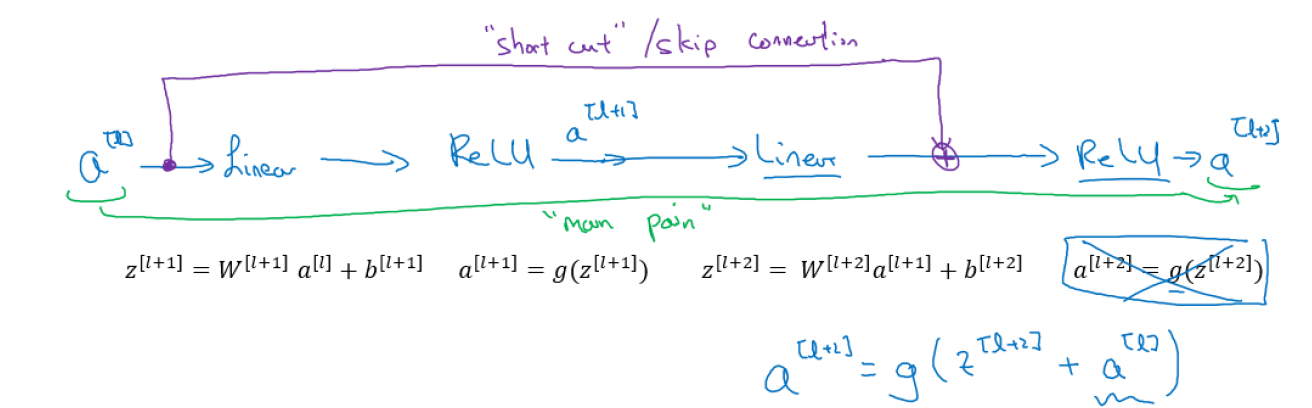
  + preformance of ResNet improves with the increase of number of layers
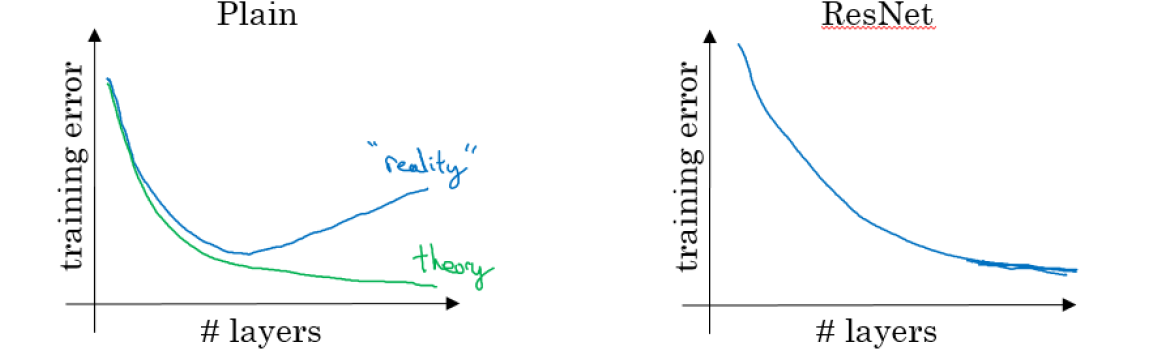
  + why ResNet works?
    + adding a(l) to activation function can help to prevent the negative or zero input to the activation function input and allows the deep layers to learn
    + need to ensure a(l) and z(l+2) if we jump connect a(l) to the input of l+2 activation should have the same dimension
    + example: Resnet-34
      + use (3, 3) for all convs
      + when doubling channel size, shrink the image size by 2 using down-sampling by 2 and pad zeros
    + residual blocks types
      + identity block: directly connect a(l) to the input of activation of a later layer
      + convolutional block: connect the a(l) convolved and batch normed result to a input of activation of a later layer. ( the conv can be bottleneck 1 times 1 conv)
    + 1 times 1 convolution (called bottleneck, BN)
      + we use it to shrink the channel (shrink input from (6, 6, 32) to (6, 6, 5))to save computations
      + we can keep the same number of channels. then use 1 times 1 conv as a nonlinearity operation to learn nonlinearity
      + bascially, we can replace fc layers with 1 times 1 conv
* Inception
  + use all the (1, 1), (3, 3), (5, 5) and max-pool and maintain the same dimension of image as input
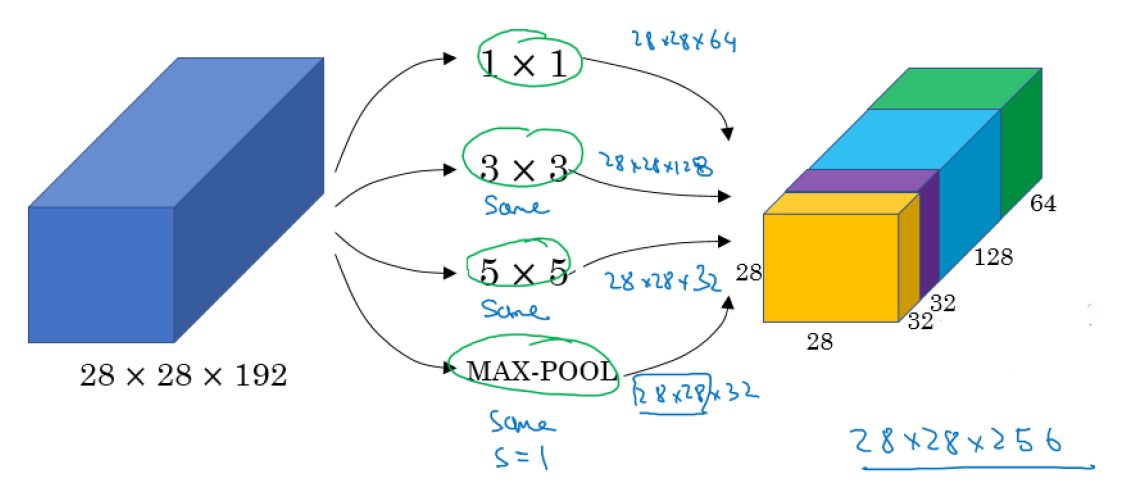
  + in the example, input from (28, 28, 192) to (28, 28, 256)
  + problem is the calculation. For example
    + to convert (28, 28, 192) to (28, 28, 32 ) using 32 of (5, 5, 192) filter.
    + since we have (28, 28, 32) image output size, each (5, 5, 192) need to multiply with the corresponding elements from the input image by (28, 28, 32) times, and each multiplication requries (
  (5, 5, 192) calculation. so we finally need outputs X filter size X filter size X input dimensions = 28 X 28 X 32 X 5 X 5 X 192 = 120 mil
  + we can use the 1 times 1 cov in the middle to reduce the computation
    + convert (28, 28, 192) to (28, 28, 16) by 16 of (1, 1, 192) filters. The calculation is
    28*28*16*1*1*192 = 2.5 mil
    + then convert (28, 28, 16) to (28, 28, 32) by 32 of (5, 5, 16) filter. the calculation is 28X28X32X5X5X16= 10 Mil
    + altogether is 12.5 Mil
  + apply BN to inception
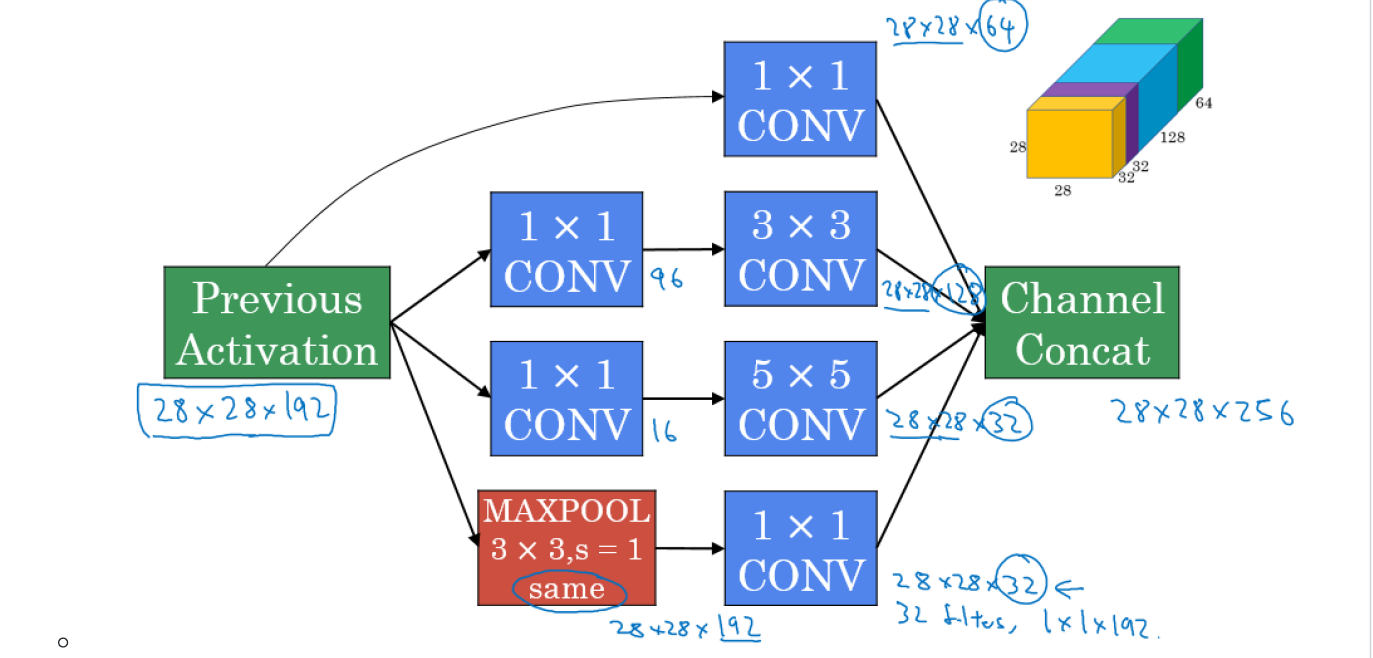
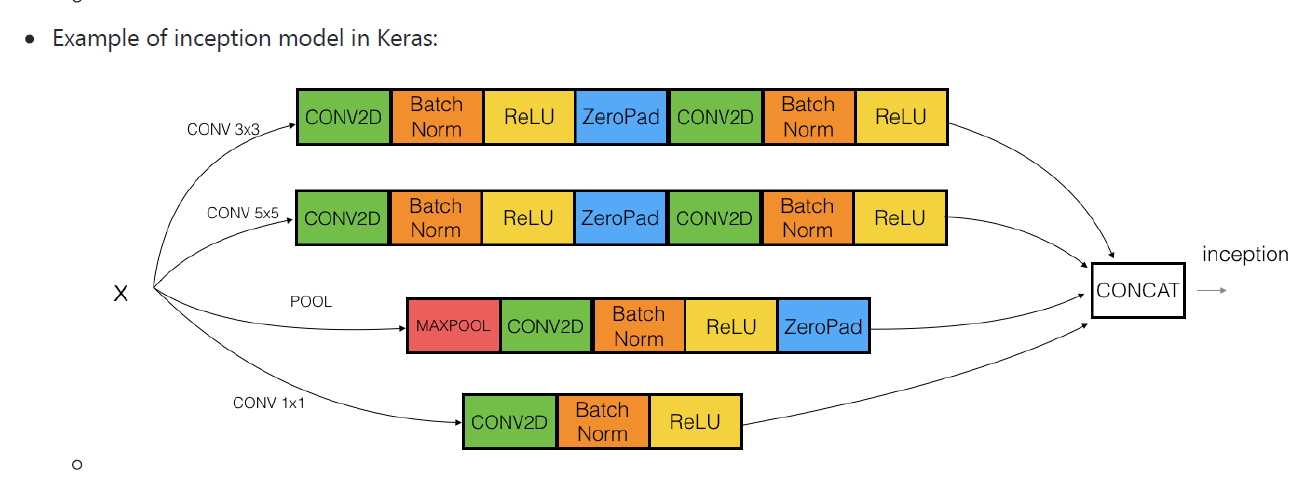

    
        

### Transfer Learning
* we can use a pretrained model with its weights and parameters that help to boost the performance of model
* If we don't have a lot of training data, we can download a good NN with model with its weights, remove the softmax activation layer and put your own one and make the network learn only the new layer ehile other layer weights are fixed/frozen
* frameworks have the options to make the parameters frozen in some layers using trainable = 0 or freeze = 0
* one of the tricks that can speed up training is to run the pretrained NN witout final softmax layer and get an intermediate representation of your images and save them to disk. Then use these representation to a shallow NN network. This can save you the time needed to run an image through all the layers.
  + this is like coverting your images into vectors
* if you have a lot of training data, you can freeze few layers from the beginning fo the pretrained network and learn the other weights in the network
  + you can also throw away the layers that aren't frozen and put your own layers there
  + you can fine tune all the layers but don't random initialize the parameters and learn parameter from the pre-trained values
* if you have a large amount of data, use
  + simpler algorithm
  + less hand engineering
* if you don't have much data, people tend to try more hand engineering for the problem "Hacks", like choosing a more complex NN architecture  
  
  

### Object detection

#### Object Localization
* image classification
  + classify an image to a specific class. The whole image represents one class. we don't want to know exactly where the object is. Usually only one object is presented
  + we use a conv net with a softmax attached to the end of it
* classification with localization
  + given an image, we want to learn the class of the image and the class location in the image.
  + we need to detect a class and a rectangle to define where the object is. Usually only one object  is presented
  + we use a conv ne with a softmax attached to the end of it, and a four numbers bx, by, bh and bw to define the location of the class in the image. The training dataset should contain this four numbers wit the class.
  + examples of the prediction on target varialbe
  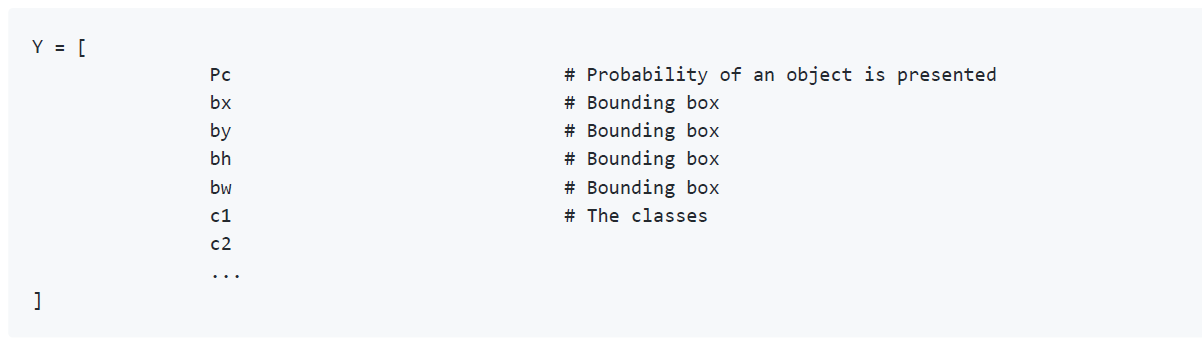
  + example of the label of the object when object is present
  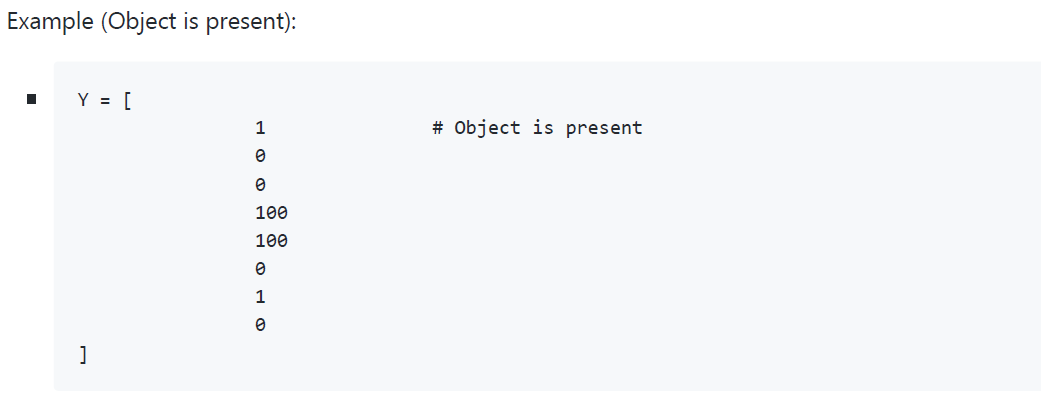
  + example of the label of the object when object is not prsented
  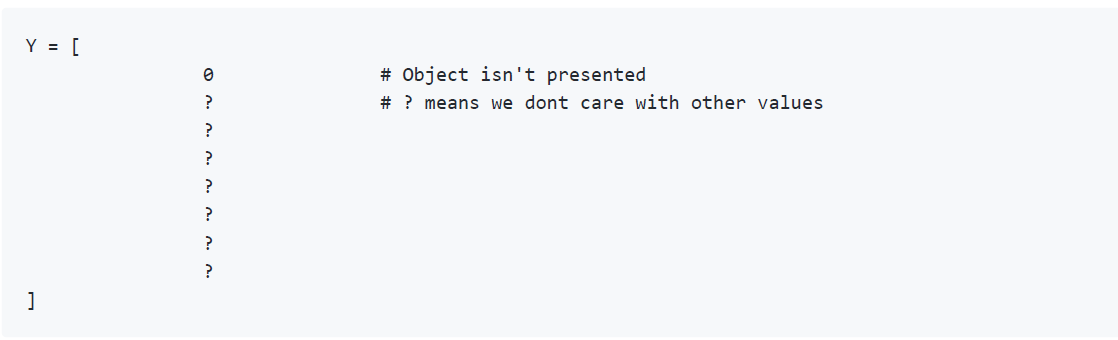
  + loss function
  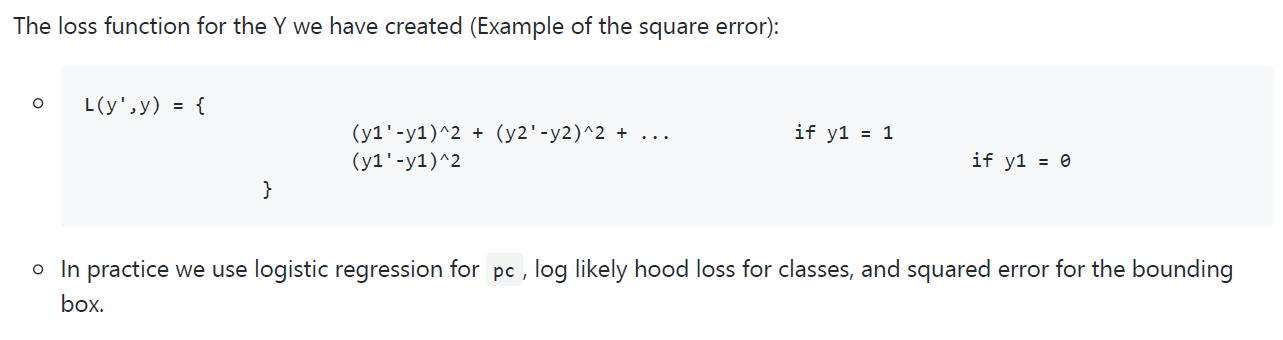
* Object detection
  + given an image we want to detect all the object in the image that belong to a specific classes and give their locations. An image can contain more than one objects with different classes
* Semantic segmentation
  + we want to label each pixel in the image with a category label. Semantic segmentation don't differentiate instances, only care about pixels. It detects n objects but pixels
  + if there are two objects of the same class is intersected, we won't be able to separate them
* Instance Segmentation
  + The full pproblem. Rather than we want to predict the bounding box, we want to know each pixel label, and distinguish them 
  
#### Landmark Detection
* in some computer vision problems, you will need to output some points called landmark detection.
  + for example, in face recognition, you might want some points on the face like corners of eyes, corners of mouth, and corners of nose and so on. This can help in a lot of applications like detecting the pose of the face
    + Y shape for the fact recognition problem needs to output 64 landmarks
    + hint: in this example, if l1x, l1y is the left corner of left eye, all l1x, l1y of other examples have to be the same 
    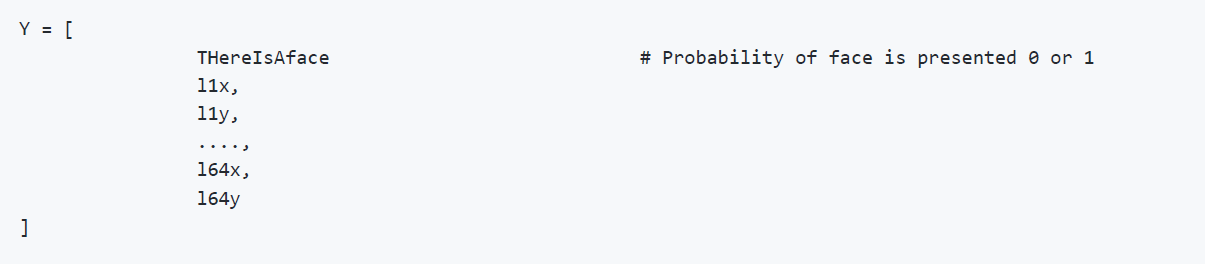
    
#### Sliding window (car detection as an example)
* Algorithm
  1. define a rectangle size
  2. split image into rectangels of the size you defined. you can use some strides
  3. for each rectangle, feed the image into conv net trained on cropped car images and non car images
  4. pick larger/smaller rectangles and repeat the process from step 2 and 3
  5. store the rectangels that contain the cars
  6. if two or more rectangles intersect, choose the rectangle with the best accuracy
* disadvantage
  + computation time.Each rectangle region is computed into the conv net independently
  + if you use a large stride to decrease the number of rectangles, you may miss the important details
  + before deep learning, people used a hand crafted linear classifiers to classify objects and then use sliding window technique. Deep learning is much computational expensive
  + we can solve this problem using sliding windows with a convolutional approach, or compress the deep learning model

#### Convolutional implementation of sliding windows
* turning FC layer into conv layers (predict image class from 4 classes)
  + we turn the FC layer into a conv layer using a convolution with the width and height of the filter the same size as the width and height of the input (here we use 400 of (5, 5. 16) filters to convert the (5, 5, 16) input into (1, 1, 400) output, and then use a BN layer to keep the size of (1, 1, 400), which finally is converted into (1, 1, 4) using 4 of (1, 1, 400) filters
  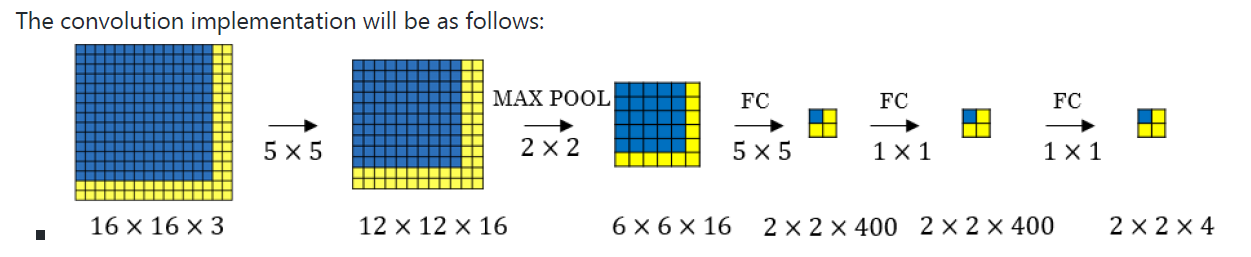
  + instead of sliding windows one by one and compute each of the rectangle in the window by an indenpedent conv net, now by feeding the image to the conv net once, all the different blocks of the rectangles are computed. This is more efficient since the blocks share the computations. The overlapping regions of the blocks don't need to be feed into the conv net and re-caluculated
  + disadvantage
    + the positions of rectangles won't be accurate. Maybe none of the rectangles is exactly on the object you want to recognize
    
#### YOLO algorithm
* YOLO is better than sliding windows algorithm to define the bounding box positions to be more accurate
* YOLO stands for you only look once
* YOLO is a labeling technology. You first split the image into grids (for example, split a 100 by 100 images to 19 by 19 grids). In the rectangle region defined by each grid, you label the object, as in object localization, with pc, xb, yb, width and height, c1, c2 and c3). Therefore, you will have 19 by 19 such y labels. Each label for one grid cell. If a cell doesn't contain the object, just assign 0 to pc and ? for all the other label values.
* more specifically, the object is assigned to the grid cell where its mid point falls in.
* pc, xb, yb, width and height, c1, c2, and c3 defines if the object present, the center x of the object bouding box, center y of the object bounding box, the width and height of the box, if the object is a person, a car or a motocyle.
  + xb and yb are relative to the grid, where (0,0) and (1, 1) represent the top left and bottom right corners of the grid cell. Their values are between 0 and 1
  + width and height defines the dimensions of the bounding box using the grid cell's width and height as unit. It can be larger than 1
* since we have 19 by 19 grids, and each grid has a 8-element y vector, we finally have the target output as number of grid cells time 8 (19 by 19 by 8)
* after labelling this 19 by 19 by 8 vectors, you train your input images of 100 by 100 by 3 and convert it to 19 by 19 by 8 using convolution transformations, and train the conv net to fit the output to match the YOLO labels
* the algorithm only works when there is only one object in each cell. Can use small grid cells to ensure that
* the algorithm allows you to define the positions and dimensions of objects accurately
* the algorithm is a conv method. You don't need to repeat the calculation by the number of grid cell times. You run the conv net once. It runs fast even for real time object detection

* Intersection over union
  + Intersection over union is a function used to evaluate the object detection algorithm
  + it computes the size of intersection and divide it by the union. IOU is used as a measure of the overlap obetween two bounding boxes. The details are describe in the following picture:
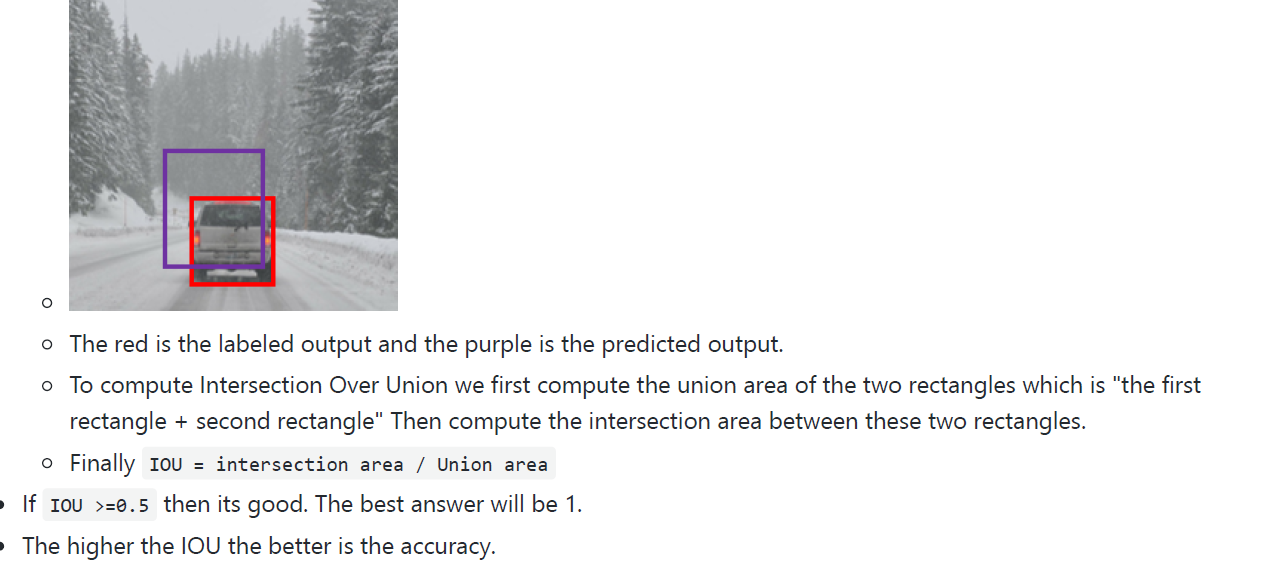 

* Non-max suppression
  + different grid cells may claim to detect the same objects. As a result, the same object may be detected multiple times
  + Non-max suppression is a way to make sure the YOLO detects the object just once
    + if Y shape is (pc, bx, by, bh, bw) where pc is the probability if the object occurs (let's assume we are targeting one class as an output class)
    + discard all boxes with pc < 0.6
    + if there are still remaining multiple boxes
      + pick the box with the highest pc
      + discard any remaining box with IoU > 0.5
    + if you want to detect mulitiple classes/object types (say c different object classes), you run the Non-max suppression c times. Once for each output class  

* Anchor boxes
  + In YOLO, a grid only detects one object. What if a grid cell wants to detect multiple objects?
  + define multiple anchor boxes in each grid. Each anchor box corresponds to one object
    + Y = \[Pc, bx, by, bh, bw, c1, c2, c3, Pc, bx, by, bh, bw, c1, c2, c3\]. The first part is the anchor box corresponds to object 1, and the scond Pc-c3 part is the box for the second object
    + objects belong to the grid based on its middle point, and anchor box based on the highest IoU.
    + you can have multiple anchor box shapes (5-10) to cover the types of objects you detect frequently
  
* R-CNN
  + an algorithm also makes an object detection
  + stands for regions with Conv Nets
  + pick a few windows and run a conv net on top of them
  + use a segmentation algorithm to pick windows. For example, if the segment algorithm produces 2000 blob then we should run our classifier/CNN on top of these blobs
  

### Face Recognition
* identify a person's face. It can work on both images or videos
* face verification vs face recognition
  + verification
    + input: image, name/ID (1:1)
    + output: whether the input image is that of the claimed person
  + recognition
    + has a database of K persons
    + get an image
    + output ID if the imgae is any of the K person, or not recognized
* one-shot learning
  + a recognition system is able to recognize a person, learning from one image
  + the challenge is the small number of training data
  + we define a similarity function
    + d(img1, img2) = degree of difference between images. d should be low if img1 and img two are the same face
    + set tau T as a threshold for d:
      + if d(img1, img2) <= T then the face are the same
    + similarity function helps us solving the one shot learning. Also it is robust to new inputs

#### Siamese Network
* implement similarity function using a type of NNs called Siamese network where we pass multiple inputs to the two or more networds with the same architecture and parameters
* For example, we make 2 identical conv nets which encode an input imge x1 and x2 into vectors, such as 128 element vectors, as f(x1) and f(x2), respectively. If the x1 and x2 are images of the same person, loss function d(x1, x2) = ||f(x1) - f(x2)||^2 should be small. Otherwise, it should be high
* Triplet function
  + the basic idea of triplet function is to set the objective function so that the difference between an anchor image and positive images (the same person as the anchor image) should be smaller than the differenct between the anchor image and negative images. Therefore, you always look at three images at a time
  + d(A, P) - d(A, N) + alpha <= 0 to prevent algorithm always output 0 to satisfy the function
  + alpha is called margin that can be adjusted to push the two items apart further
  + Loss function = max(||f(A) - f(p)||^2 - ||f(A) - f(p)||^2 + alpha, 0). as long as the first item is negative, we don't care how negative it is.
  + if you have 10K pictures of 1k persion, separate the images to triplets to train the NN. You need each person to have multiple pictures to have pairs of anchor and positive images for each person
  + to improve the efficiency of the learning algorithm, we should choose the triplet so that A, P and N are similar to make it hard to learn and enable the algorithm to tell the small difference between images from different persons. So don't choose the triplets randomly
* other loss function
  + we can get the 128 element vector, each element of this vector is the absolute difference between the two encoded vectors at a certain position. we then apply sigmoid funtion to the vector, and use logistic regression to train the weight of 128 vector and an intercept item to tell if the images belong to different or same persons. In another word, we use the absolute difference between the encoded vectors of the two images, and use logistic regression as a binary classifier to classify if two images are belong to the same or different persons
  + in this method, the inputs are a pair of images
  + if the images in database have been encoded, instead of input images, we can directly use the encoded vectors of the images to calculate the difference for new images.
  
#### Neural Style Transfer
* an application of conv nets
* takes a content image c and a style image s and generates the content image G with the style of style image
* the idea of using a network trained on a different task and applying it to a new task is called transfer learning
* to combine the content and styles of the images together, we need to look at features extracted by different layers of NN
  + the shallow layers extracts simple patterns, while the deep layers extracts complicated patterns for object detections
  
* cost function of neural style transfer
  + J(G) = alpha Jconent(C, G) + beta Jstyle(S, G) defines the cost function of the gerated image G, and content image C and style image S. Jcontent and Jstyle are cost functions for content and style, respectively. These cost functions evaluate the similarities between G and C, and G and S.
  + Use cost function to generate images
    + generate a 100 by 100 by 3 random image
    + use gradient descent to minimize J(G) and updates the pixels of image G to reduce the cost function
  + content cost function
    + the more shallow layer you select to compute content cost, the more accurate the generated image will copy the content image. The deeper the layer you select to compute the content cost, the image will be more similar in pattern, not just copy the content exactly
    + we usually select some layer in the middle
    + what we do is to use a pre-trained ConvNet, for example, VGG network
    + let a(l)(c) and a(l)(G) be the activation of layer l on the content and generated images
    + if a(l)(c) and a(l)(G) are similar, both images have similar content
    + we can use L2 of the difference between these two vectors as the cost function
    + Jcontent(C, G) = 1/2 ||a(l)(c) - a(l)(G)||^2
    + the cost function for content is based on pixel to pixel comparison
  + style cost function
    + styles are defined as correlation between activations across channels. We evaluate how activations are correlated across different channels
      + the correlations defines if different patterns catched by different channels will occur together, not or random, which defines the relationship between these patterns in the image
    + to calculate G for kk' at layer l where k and k' represent the channels of k and k', we added the element wise product of activations of ai,j, k time ai, j, k' for the entire image (i and j represents the row and column pixel coordinates) at channels k and k' and add them together as the un-normalized covariance at layer l
    + the style cost function for layer l is the total of the square of the difference between Gs and G(G) across all channels
    + 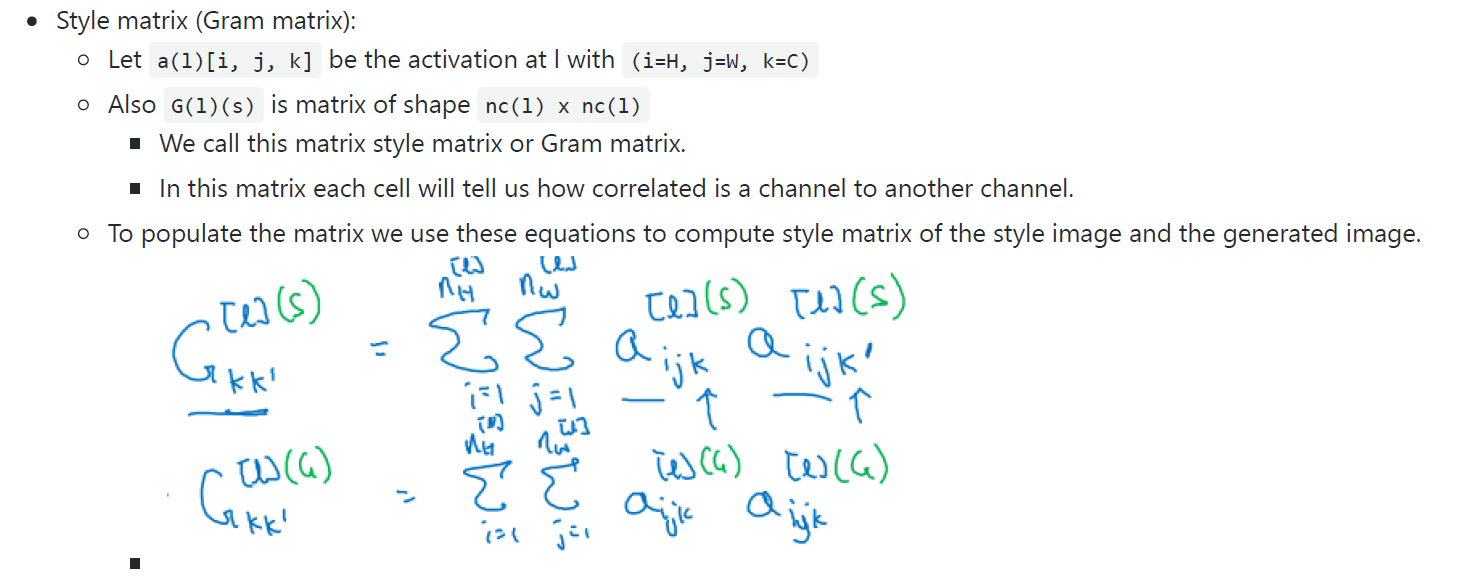
    + 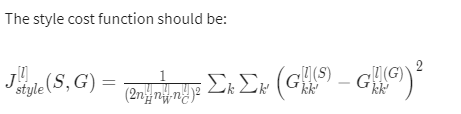
    
    
   

### 1D and 3D generalizations
* we can apply 1d and 3d filters to the input images. The only difference between these and 2d images is that we apply the filters on 1d or 3d. in 1d, we scan the 1d data in one direction. In 3d, we scan the data in 3 directions